In [20]:
import pandas as pd
from pandas.plotting import scatter_matrix
import plotly.express as px
from copy import copy
import numpy as np
import yfinance as yf


# Import Info From Yahoo Finance

In [21]:
sp500 = yf.download('^GSPC',
                    start = '2020-01-01',
                    end = '2021-01-01'
                   )
msft = yf.download('MSFT',
                   start = '2020-01-01',
                   end = '2021-01-01'
                    )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,192.910237,195.465138,190.377431,193.026126,190.092041,3.765959e+07
std,23.102141,22.634497,23.283062,22.995562,23.128523,1.690529e+07
min,137.009995,140.570007,132.520004,135.419998,132.974579,1.055060e+07
25%,174.199997,175.669998,170.910004,174.380005,170.906982,2.617760e+07
50%,200.419998,203.949997,197.740005,201.910004,198.816055,3.279080e+07
75%,213.100006,214.839996,210.309998,212.830002,209.710129,4.387230e+07
max,229.270004,232.860001,227.350006,231.649994,228.651733,9.701270e+07


In [23]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,3217.750272,3242.183946,3190.484464,3217.855849,3217.855849,4.919603e+09
std,318.362931,308.633058,330.233545,319.226157,319.226157,1.347771e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.885090e+09
25%,3045.750000,3079.760010,2998.610107,3036.129883,3036.129883,3.926380e+09
50%,3280.610107,3288.129883,3253.219971,3276.020020,3276.020020,4.665380e+09
75%,3411.229980,3431.560059,3384.560059,3408.600098,3408.600098,5.477040e+09
max,3750.010010,3760.199951,3730.209961,3756.070068,3756.070068,9.044690e+09


In [24]:
ex_df=pd.DataFrame(index=sp500.index)
ex_df['sp500'] = sp500['Open']
ex_df['msft'] = msft['Open']

ex_df

,sp500,msft
Date,,
2020-01-02,3244.669922,158.779999
2020-01-03,3226.360107,158.320007
2020-01-06,3217.550049,157.080002
2020-01-07,3241.860107,159.320007
2020-01-08,3238.590088,158.929993
...,...,...
2020-12-24,3694.030029,221.419998
2020-12-28,3723.030029,224.449997
2020-12-29,3750.010010,226.309998


In [25]:
df=pd.DataFrame(index=sp500.index)
df['sp500'] = sp500['Open']
df['msft'] = msft['Open']

df

,sp500,msft
Date,,
2020-01-02,3244.669922,158.779999
2020-01-03,3226.360107,158.320007
2020-01-06,3217.550049,157.080002
2020-01-07,3241.860107,159.320007
2020-01-08,3238.590088,158.929993
...,...,...
2020-12-24,3694.030029,221.419998
2020-12-28,3723.030029,224.449997
2020-12-29,3750.010010,226.309998


# Data Visualization

In [26]:
def interactive_plot (df, title):
    fig = px.line(title = title)
    for i in df.columns[0:]:
        fig.add_scatter(x = df.index, y = df[i], name = i)
    fig.show()

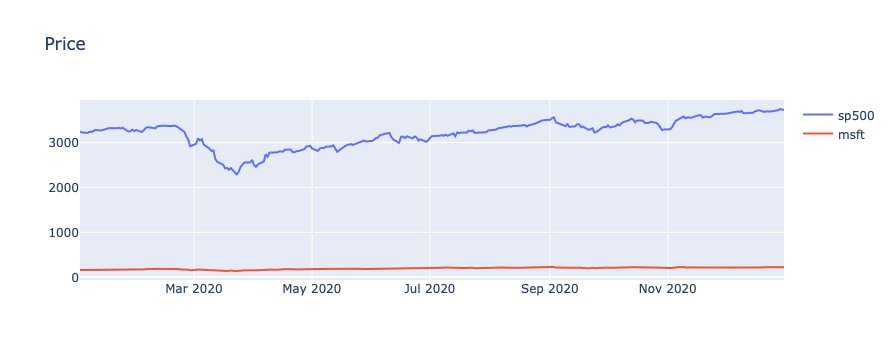

In [27]:
interactive_plot(ex_df, 'Price')

# Return from inital investment

In [28]:
def return_inital(df):

    x = df.copy()
    
    for i in x.columns[0:]:
        x[i] = ((x[i]/x[i][0]) - 1) * 100
        
    return x

In [29]:
return_inital(ex_df).head()

,sp500,msft
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.564304,-0.289704
2020-01-06,-0.835828,-1.070662
2020-01-07,-0.086598,0.340099
2020-01-08,-0.187379,0.094466


# Daily Change

In [30]:
daily_df=pd.DataFrame(index=sp500.index)
daily_df['sp500'] = sp500['Open'].shift(-1) - sp500['Open']
daily_df['msft'] = msft['Open'].shift(-1) - msft['Open']

daily_df.head()

,sp500,msft
Date,,
2020-01-02,-18.309814,-0.459991
2020-01-03,-8.810059,-1.240005
2020-01-06,24.310059,2.240005
2020-01-07,-3.270020,-0.390015
2020-01-08,27.439941,2.910004


# Daily Return

In [31]:
stocks_daily_return = (ex_df/ex_df.shift(1) -1).dropna()
stocks_daily_return

,sp500,msft
Date,,
2020-01-03,-0.005643,-0.002897
2020-01-06,-0.002731,-0.007832
2020-01-07,0.007555,0.014260
2020-01-08,-0.001009,-0.002448
2020-01-09,0.008473,0.018310
...,...,...
2020-12-24,0.000165,-0.007575
2020-12-28,0.007851,0.013684
2020-12-29,0.007247,0.008287


<AxesSubplot:xlabel='sp500', ylabel='msft'>

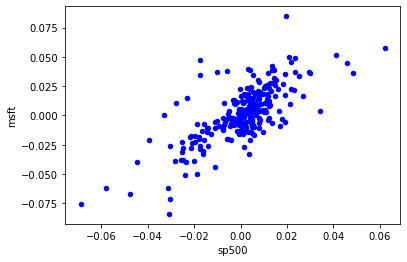

In [32]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'msft', color = 'b')

# Beta Calculation

In [33]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['msft'], 1)
print('beta for {} is {} and alpha is {}'. format('msft', beta, alpha))

beta for msft is 1.0943651664720622 and alpha is 0.0008564190381613405


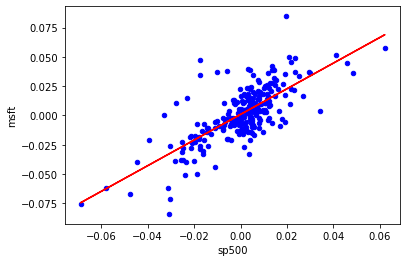

In [34]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'msft', color = 'b')
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

# CAPM Calculation

In [35]:
rm = stocks_daily_return['sp500'].mean() * 252
print(rm)

rf = 0

0.17168192342148614


In [36]:
CAPM_MSFT = rf + beta*(rm-rf)
CAPM_MSFT

0.1878827167053985